### 1st model is best

#### Just run it for better accuracy

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape (60000, 28, 28) y_train shape (60000,)
60000 train_set
60000 test_set
y = 2 Pullover


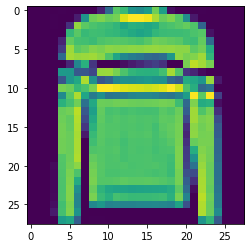

In [3]:
print("x_train shape",x_train.shape,"y_train shape",y_train.shape)
print(x_train.shape[0],'train_set')
print(y_train.shape[0],'test_set')
#define text labels
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9
# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [4]:
from matplotlib import pyplot

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


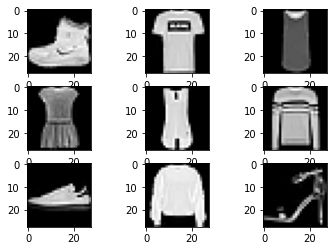

In [5]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
print("Number of train data - "+ str(len(x_train)))
print("number of test data - "+ str(len(x_test)))

Number of train data - 60000
number of test data - 10000


In [8]:
(x_train,x_valid) = x_train[5000:],x_train[:5000]
(y_train,y_valid) = y_train[5000:],y_train[:5000]

In [9]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0],w,h,1)
x_valid = x_valid.reshape(x_valid.shape[0],w,h,1)
x_test = x_test.reshape(x_test.shape[0],w,h,1)

In [10]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_valid = tf.keras.utils.to_categorical(y_valid,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [11]:
# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [12]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
history=model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=1,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

859/860 [============================>.] - ETA: 0s - loss: 0.6011 - accuracy: 0.7779
Epoch 1: val_loss improved from inf to 0.37545, saving model to model.weights.best.hdf5
860/860 [==============================] - 76s 87ms/step - loss: 0.6011 - accuracy: 0.7779 - val_loss: 0.3754 - val_accuracy: 0.8650


In [15]:
model.load_weights('model.weights.best.hdf5')

In [16]:
score = model.evaluate(x_test,y_test,verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.859000027179718


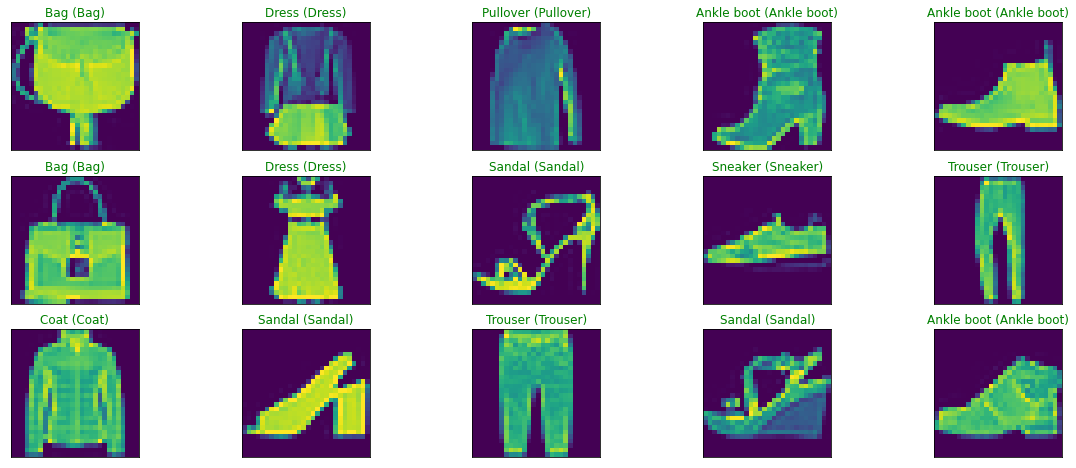

In [17]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [18]:
from sklearn.metrics import classification_report
preds = model.predict(x_test)

# show the nicely formatted classification report
print("Evaluating network...")
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
     target_names=fashion_mnist_labels))


Evaluating network...
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.86      0.68      0.76      1000
       Dress       0.82      0.89      0.85      1000
        Coat       0.67      0.88      0.76      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.67      0.55      0.60      1000
     Sneaker       0.94      0.93      0.93      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


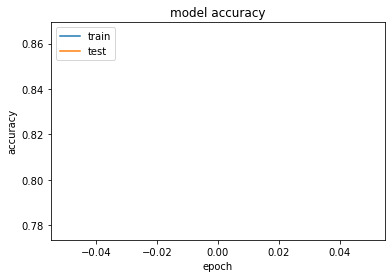

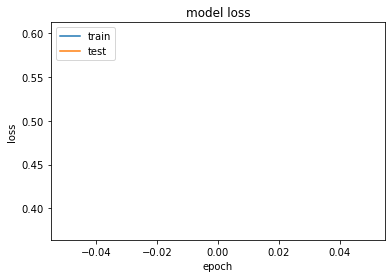

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()